# GBM

Необходимо убедиться, что deg в util и в 3 ячейке совпадают. 

In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
from util import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


D:\conda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\conda\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Подготовка данных: из выборки удаляются дубли, проиходит преобразование y и т.д.

In [2]:
train = pd.read_csv("train.tsv")
test = pd.read_csv("test.tsv")
ind = np.arange(2,36)

In [3]:
deg = 4.0
train['y'] = train['y'].apply(lambda x: x**(1.0/deg))

In [4]:
def calc_date(x):
    x[1] = x[1] - x[2] + 1;
    if (x[1] > 0):
        return x
    
    x[0] -= 1
    x[1] += 52
    return x

In [5]:
X = train.take(ind, axis=1)
X[['year', 'week', 'shift']] = X[['year', 'week', 'shift']].apply(lambda x : calc_date(x), axis=1)
X = X[np.invert(X.duplicated(['item_id', 'year', 'week']))]
X = X.drop('shift', axis=1)

D:\conda\lib\site-packages\pandas\core\frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [6]:
y = train.get(['y', 'week', 'year', 'item_id'])
y = y[np.invert(y.duplicated(['item_id', 'year', 'week']))]

In [7]:
df = pd.merge(X, y, on=['item_id', 'year', 'week'])

In [8]:
df

,year,week,item_id,f1,f2,f3,f4,f5,f6,f7,...,f22,f23,f24,f25,f26,f27,f28,f29,f30,y
0,2012,52,20442076,4915.0,38056.0,40185.0,45733.0,59710.0,39982.0,45846.0,...,41765.0,52590.0,31452.0,44420.0,41865.0,52705.0,36102.0,44163.0,45239.0,18.743998
1,2012,52,20441997,2230.0,18817.0,20110.0,26368.0,31412.0,23182.0,24565.0,...,25230.0,27850.0,21390.0,27090.0,23170.0,29705.0,19140.0,22055.0,23200.0,15.546112
2,2012,52,20441990,5695.0,47480.0,47619.0,89708.0,166338.0,37620.0,85607.0,...,44290.0,46412.0,29320.0,21140.0,28406.0,65056.0,31886.0,48750.0,36520.0,20.121697
3,2012,52,20441989,1995.0,17146.0,20066.0,27070.0,35337.0,14575.0,18989.0,...,12480.0,19780.0,7990.0,8230.0,10650.0,21920.0,13040.0,9780.0,9630.0,15.237061
4,2012,52,20441988,6515.0,49262.0,50045.0,95167.0,102390.0,23802.0,44383.0,...,19328.0,37168.0,13570.0,19760.0,20208.0,34745.0,18442.0,24700.0,21793.0,18.042459
5,2012,52,20441953,445.0,3020.0,2395.0,4015.0,5780.0,3468.0,3730.0,...,7690.0,13448.0,3455.0,7205.0,8490.0,10790.0,7855.0,8150.0,7505.0,12.062445
6,2012,52,20441952,445.0,3930.0,4260.0,6836.0,12175.0,3390.0,4315.0,...,8064.0,15275.0,4991.0,9025.0,12236.0,19830.0,8465.0,10770.0,13145.0,15.850958
7,2012,52,20441951,1167.0,15220.0,12310.0,17270.0,20750.0,10085.0,14116.0,...,20376.0,25385.0,11685.0,21389.0,16685.0,22805.0,14495.0,16462.0,19383.0,14.483237
8,2012,52,20441790,1640.0,22010.0,17716.0,21941.0,28430.0,18697.0,20600.0,...,17758.0,26181.0,11090.0,17705.0,17225.0,23385.0,13711.0,17175.0,22406.0,15.187350
9,2012,52,20441789,1440.0,14601.0,12127.0,17498.0,22130.0,13160.0,15726.0,...,15015.0,18574.0,9146.0,14865.0,13051.0,17389.0,10739.0,13260.0,15570.0,13.834082


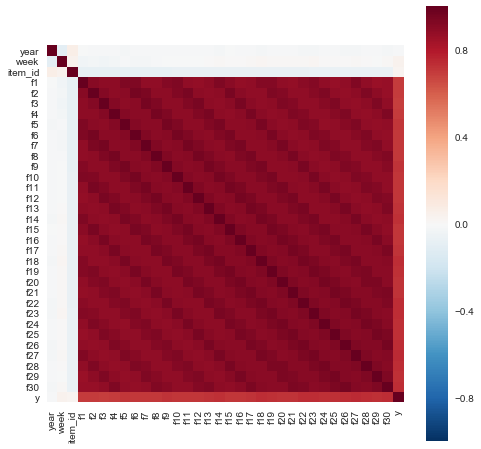

In [9]:
plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), square=True)
plt.show()

In [10]:
X_train = df.drop(['y'], axis=1)
y_train = df['y']

Удаление выбросов

In [11]:
%%time

model = GradientBoostingRegressor(n_estimators=50, max_depth=4, random_state=43)
model.fit(X_train, y_train)
X_pred = model.predict(X_train)
err = abs(X_pred**deg - y_train**deg)

Wall time: 7.75 s


In [12]:
model.feature_importances_

array([  2.50272205e-02,   1.41862507e-01,   1.33737826e-02,
         3.88211636e-03,   6.56876472e-03,   2.33171254e-04,
         0.00000000e+00,   3.74116675e-02,   0.00000000e+00,
         4.27474961e-04,   8.03618187e-05,   3.65041820e-02,
         0.00000000e+00,   4.18867808e-04,   2.11297204e-03,
         2.20973744e-05,   5.16122056e-04,   0.00000000e+00,
         1.68893664e-03,   5.34654684e-04,   1.85186809e-03,
         9.95837606e-04,   0.00000000e+00,   1.42891296e-02,
         1.02861185e-01,   2.60785334e-03,   2.28345272e-03,
         9.97349344e-03,   3.60930252e-02,   1.58954990e-01,
         7.71006870e-02,   1.53190484e-01,   1.69133094e-01])

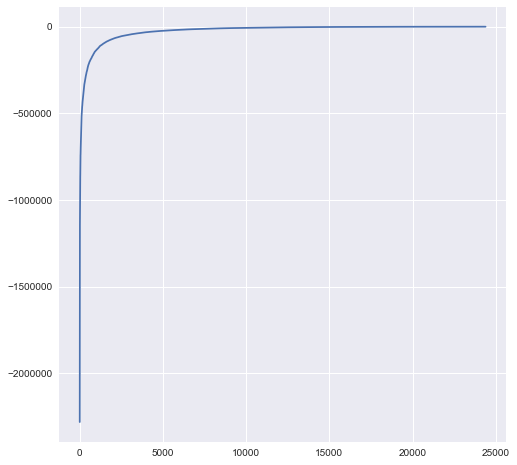

-134712.39477


In [13]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(err.size), np.array(sorted(-err)))
plt.show()
print sorted(-err)[1000]

In [14]:
mask = abs(X_pred**deg - y_train**deg) < 100000
X_train= X_train[mask]
y_train = y_train[mask]
print y_train.size

23003


In [16]:
model_final=GradientBoostingRegressor(min_samples_split=100, min_samples_leaf=20, n_estimators=2500, learning_rate=0.005,
                                     max_depth=8, max_features=14, subsample=0.85, random_state=1)
model_final.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.005, loss='ls', max_depth=8, max_features=14,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=20, min_samples_split=100,
             min_weight_fraction_leaf=0.0, n_estimators=2500,
             presort='auto', random_state=1, subsample=0.85, verbose=0,
             warm_start=False)

In [17]:
test = pd.read_csv("test.tsv")
test.rename(columns ={'shift':'shif'}, inplace=True)
one_week = test[test.shif==1].drop(['shif'], axis=1)
X_test = one_week.drop(['Num'], axis=1).take(np.arange(0,33), axis=1)


In [18]:
y_test = model_final.predict(X_test)
y_test = pd.Series(y_test**4, name='y')

answer=X_test[['year', 'week', 'item_id']]
answer.index=np.arange(672)
answer = pd.concat([answer, y_test], axis=1)

In [19]:
filler = test[['Num', 'year', 'week', 'item_id']]

In [20]:
an = pd.merge(filler, answer, on=['item_id', 'year', 'week'], how='left')
an = an[['Num', 'y']]

In [21]:
#an.to_csv("submission.tsv", sep=',', index=False)

In [22]:
an

,Num,y
0,348622,1793.472605
1,348623,22560.902003
2,348624,283358.847071
3,348625,31621.155894
4,348626,43.006443
5,348627,134491.993301
6,348628,72842.290168
7,348629,82418.145349
8,348630,85626.370425
9,348631,2106.720708


Выше получены (почти) честные ответы. Уточним их.

In [27]:
leak = pd.read_csv("leak.tsv")

In [48]:
full = pd.merge(an, leak, on=['Num'], how='left')

In [49]:
full['y'] = full[['y', 'l']].apply(lambda x: x[0] if math.isnan(x[1]) else x[1], axis=1)

In [50]:
full

,Num,y,l
0,348622,1497.000000,1497.0
1,348623,27033.000000,27033.0
2,348624,297560.000000,297560.0
3,348625,29471.000000,29471.0
4,348626,16.000000,16.0
5,348627,146242.000000,146242.0
6,348628,67735.000000,67735.0
7,348629,111941.000000,111941.0
8,348630,102631.000000,102631.0
9,348631,3542.000000,3542.0


In [52]:
full[['Num', 'y']].to_csv("GBM_l.tsv", sep=',', index=False)